# Miniscope data processing pipeline

## Behaviour extraction

First, we need to process the behaviour camera videos. The module `behav` under `McMini` contains all the necessary tools for the task. We will walk through the main functionalities in this tutorial, starting with the class `behav.processor`.

In [2]:
# Import the class McMini.behav.processor
from McMini.behav import processor
# Define the path where the behaviour videos are stored
# The AVI videos should be numerically ordered (e.g., 1.avi, 2.avi, ...)
root = '/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/'
# Instantiate an object of class behav.processor with the folder path
b = processor(root)

We now have an object of class `behav.processor`. We can list all the videos using `behav.processor.list()`.

In [3]:
b.list()

[ind][processed]	 filename
[  0][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/0.avi
[  1][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/1.avi
[  2][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/2.avi
[  3][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/3.avi
[  4][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/4.avi
[  5][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/5.avi
[  6][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/6.avi
[  7][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/7.avi
[  8][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/8.avi
[  9][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/9.avi
[ 10][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/10.avi
[ 11][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/11.avi
[ 12][ ]	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/12.avi
[ 13][ ]	/home/loulou/Documents/sa

There are a total of 72 videos. With the function `behav.processor.runall()`, we can process all the videos in sequence, and extract the position and heading vectors. Alternatively, the function `behav.processor.run(index)` allows a single video at `index` to be processed.

In [4]:
b.runall()
b.list()

processing all remaining behaviour videos...
(  1/ 72)	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/13.avi	ETA:11061.668 sec
(  2/ 72)	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/14.avi	ETA:5558.665 sec
(  3/ 72)	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/2.avi	ETA:3678.534 sec
(  4/ 72)	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/5.avi	ETA:2727.988 sec
(  5/ 72)	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/10.avi	ETA:2151.887 sec
(  6/ 72)	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/6.avi	ETA:1766.475 sec
(  7/ 72)	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/15.avi	ETA:1494.141 sec
(  8/ 72)	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/7.avi	ETA:1292.064 sec
(  9/ 72)	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/0.avi	ETA:1134.805 sec
( 10/ 72)	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/1.avi	ETA:1007.634 sec
( 11/ 72)	/home/loulou/Documents/sandbox/miniscope

Now all the videos have been processed. At this stage, we can extract the position, heading, file paths and file indices by `pos, heading, files, idx = behav.processor.get()`. Just to be safe, we will evoke the command `behav.processor.save()` to save the data in the `root` folder so that it can be accessed later.

In [5]:
b.save()

behaviour data exported as	/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/behaviour.h5


Seeing is believing. Let us play the first video by calling `behav.processor.show(index)` to make sure that the extraction went well.

_**TODO**: The heading vector sometimes flip to the wrong direction. I implemented a correction, but it is not perfect. To the poor bastard who has to work on my code in the future, you have my deepest sympathy._

In [6]:
b.show(0)

Looking good. Let us use the `pos, heading, files, idx = behav.processor.get()` method to extract the position and heading vectors and plot those.

[3270 2861 2172 1722 1496 1087 1010  743  764  692  665  655  748  640
  586  589  669  743  788  801  812 1064 1440 1456 1858 2538 2220 1554
 1551 1443 1456 1377 1042  900 1332 1161 1264 1506 1638 1289 1287 1445
 1572 1789 2040 2266 2252 2090 2095 2581]


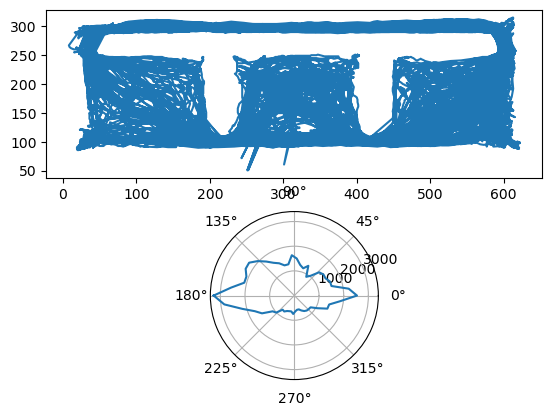

In [7]:
import matplotlib.pyplot as plt
import numpy as np

pos, heading, _, _ = b.get()

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, projection='polar')

# position trajectories
ax1.plot(*pos.T)

# polar histogram of heading direction
theta = np.linspace(-np.pi, np.pi, 51)
r, _ = np.histogram(heading, bins=theta)
print(r)
r = np.append(r, r[0])
ax2.plot(theta, r)

## Main analysis

With the behaviour videos processed, we can now move on the to main analyses. The functions used this task are found inside the module `analyzer` under `McMini`. Since we already saved the behaviour data earlier, feel free to restart the kernel to have a fresh workspace. We will first load the timestamps for both the behaviour camera and the miniscope frames using the function `analyzer.read_ts()`, and use the function `analyzer.sync_ts()` to synchronize the two.

In [1]:
# Import all function definitions from McMini
from McMini.analyzer import *

# Define path to root folder and subfolders for behaviour and miniscope videos
root = '/home/loulou/Documents/sandbox/miniscope_test/'
beh_dir = 'BehavCam_0'
scope_dir = 'Miniscope'

# Use read_ts to extract the timestamps from the CSV files
beh_ts = read_ts(os.path.join(root, beh_dir, 'timeStamps.csv'))
scope_ts = read_ts(os.path.join(root, scope_dir, 'timeStamps.csv'))

# Use sync_ts to synchronize behaviour and miniscope frames timestamps
sync_idx, unsync_idx = sync_ts(beh_ts, scope_ts)

# Load the deconvolved fluorescence from the miniscope, extracted using CaImAn
hf = h5py.File(os.path.join(root, scope_dir, 'model.hdf5'), 'r')
deconv = hf.get('estimates/S')
deconv = np.array(deconv)
deconv[deconv < 0] = 0 # The deconvolution algo sometimes yields negative values. We set those to 0

# Load the positional vectors from the behaviour data saved earlier
hf = h5py.File(os.path.join(root, beh_dir, 'behaviour.h5'), 'r')
pos = hf.get('position')
pos = np.array(pos)

# Sync the positional vectors to the deconvolved traces
# Note that the positional vectors are saved as a matrix with rows as frames and columns as x and y axes
# This is the MATLAB convention
# We will transpose it for the more numpy-friendly convention
pos = pos[sync_idx, :].T

### Generating Heat Maps

We will first construct the heatmaps for each ROI using the function `hmap, occ, smooth_map = mk_hmap(pos, deconv, smooth=False, nbins=50, sigma=3, range=None, bins=None)`. We pass the positional vectors `pos` and the deconvolved calcium series `deconv`. Optionally, we can Gaussian smooth the heatmaps with `smooth=True`. The smoothing factor is set using `sigma=VALUE`.

It is important to remove the epochs during which the animal was still, since replay and noise might introduce artifacts into the maps. We can find the moving epochs using the function `behav.moving(pos)` from the module `behav`.

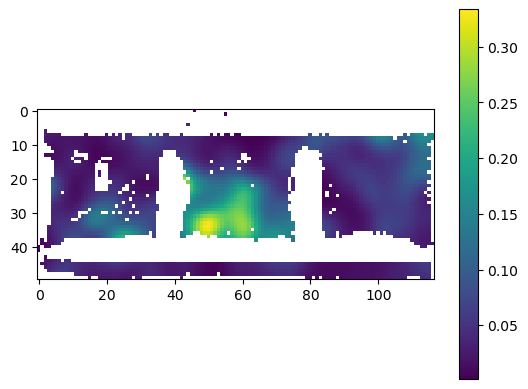

In [2]:
# Import the movement detection function from behav
from McMini.behav import moving

# Find motion epochs
mvt = moving(pos, axis=1)

# Construct heatmaps
# Heatmaps returned as 3D matrices with dimensions X, Y, neurons
hmap, occ, smooth_map = mk_hmap(pos[:, mvt], deconv[:, mvt], smooth=True)

# Let us plot the heatmap for the first neuron
plt.imshow(smooth_map[:, :, 0].T)
plt.colorbar()

### Place cells detection

There are two tests implemented for detecting place cells. The first one, `analyzer.si_test()`, is carried out by calculating the _spatial information_ and comparing it against that of a shuffled distribution. The second test, `analyzer.split_test()`, splits the recording in half and looks at the Pearson spatial correlation between the heatmaps from the two halfs. P-values from both tests are determined via permutation testing. The number of permutations can be changed from the default value by `nperms=VALUE`. Note that the _spatial information_ metric can be obtained using the function `analyzer.SI(hmap, occ, deconv)`.

running spatial information permutation test...
running split half spatial correlation test...
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True False  True False  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False  True False  True  True
 False  True  True  True False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


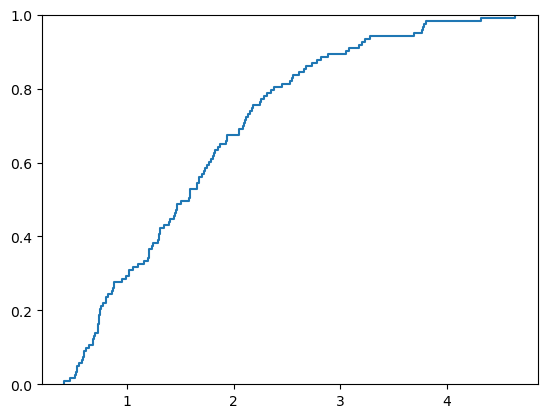

In [3]:
# Calculate spatial information for each neuron
si = SI(hmap, occ, deconv[:, mvt])

# Conduct SI test
si_pval = SI_test(pos[:, mvt], deconv[:, mvt])

# Conduct split-half test
r_pval, _ = split_test(pos[:, mvt], deconv[:, mvt])

# Find place cells that passed both tests at an alpha level of 5%
pc_list = np.logical_and(si_pval <= .05, r_pval <= .05)
print(pc_list)

# Plot the CDF of spatial information values
plt.ecdf(si)

### Bayesian decoding

Bayesian decoding is a useful way to both assess the spatial coding quality of the neuronal population and investigate potential replays. This is handled by the function `decoded, err = mape(pos, deconv, k=10, tau=30, nbins=50, sigma=5, normalize=True, penalty=2**-52, rm_idle=True)`. This function is an implementation of the _Maximum a posteriori estimation_ approach. A _k-fold_ cross-validation is built into the function, where the number of cross-validations can be set by `k=VALUE`. The value of `tau` dictated the size of the sliding window over the population timeseries (see Zhang et al., 1999). The number of positional bins and the amount of smooth applied to the heatmaps are set by `nbins=VALUE` and `sigma=VALUE`, respectively. A little bit of smoothing is recommended for calcium data, as the low temporal resolution tends to skew heavily the estimated probabilities. Normalizing the calcium traces by standard deviation by `normalize=TRUE` usually gives better estimates of position, presumably by compensating for the spherical aberrations. $\mathrm{log}(0) = -\infty$ are replaced by a constant penalty term `penalty=VALUE`. Finally, when `rm_idle=True`, decoding is only conducted over the moving epochs. The idle epochs are then decoded using the heatmaps built from the moving epochs to discover potential replays.

running CV  1/10:
running CV  2/10: sec
running CV  3/10: sec
running CV  4/10: secc
running CV  5/10: sec
running CV  6/10: sec
running CV  7/10: sec
running CV  8/10: sec
running CV  9/10: secc
running CV 10/10: sec
running idle epochsec
mean decoding error: 123.313


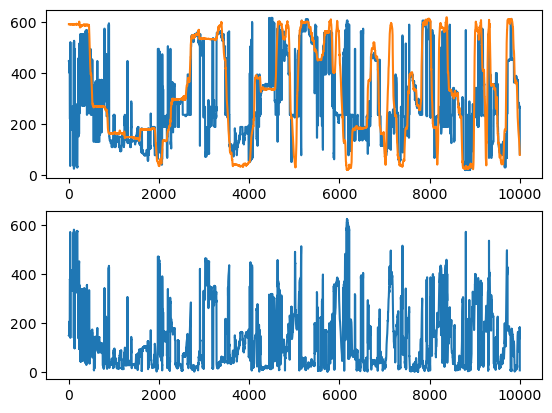

In [4]:
# Conduct Bayesian decoding
decoded, err = mape(pos, deconv)

_, ax = plt.subplots(2)

# Plot the real and decoded locations for the first ten thousand frames over the X axis
ax[0].plot(decoded[0, :10000])
ax[0].plot(pos[0, :10000])

# Plot the decoding error over time for the first ten thousand frames (Euclidean distance)
ax[1].plot(err[:10000])

We can also visualize the decoding results directly on the behaviour videos. The function `behav.player()` from the module behav accepts a `marker=pos` value to plot a marker over the decoded locations.

In [5]:
# Import video player from behav
from McMini.behav import player
from scipy.ndimage import gaussian_filter1d

# Import the original behaviour data
root = '/home/loulou/Documents/sandbox/miniscope_test/BehavCam_0/'
hf = h5py.File(os.path.join(root, 'behaviour.h5'), 'r')
og_pos = hf.get('position')
og_pos = np.array(og_pos)
og_head = hf.get('heading')
og_head = np.array(og_head)
files = hf.get('files')
files = np.array(files, dtype=str)
idx = hf.get('indices')
idx = np.array(idx)

# Let's take a look at video 30
target = 29
# Gaussian smoothing the decoded locations yields prettier decoded locations
dec = gaussian_filter1d(decoded, sigma=3)
# Play the goddamn video!
# Notice the we use the array unsync_idx, obtained earlier from sync_ts(), to sync the decoded positions back to the behaviour timestamps
_, _ = player(files[target], show=True, pos=og_pos[idx==target, :], heading=og_head[idx==target], marker=dec[:, unsync_idx[idx==target]].T)

It seems like the decoder struggles to find the animal in the alley at the bottom. We can map the average decoding error as a function of location using the `McMini.mk_hmap()` function.

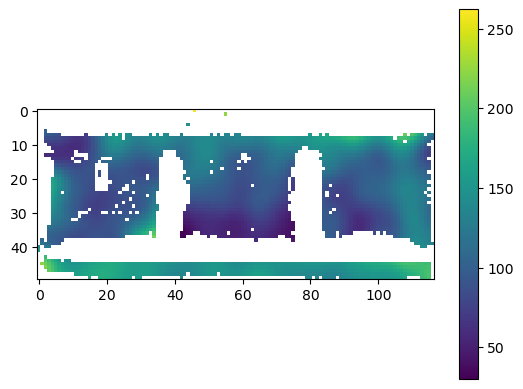

In [6]:
hmap, occ, smooth_map = mk_hmap(pos[:, mvt], err[np.newaxis, mvt], smooth=True)

plt.imshow(smooth_map.squeeze().T)
plt.colorbar()